In [55]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings
import pandas as pd
import random
from statistics import mean
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

The euclidean distance between $x$ and $y$ can be define as:
$$d = \left(\sum_{i=0}^{n} (y_i - x_i)^2 \right)^{\frac{1}{2}}$$

where $x_i$ and $y_i$ are components of $x$ and $y$, respectively.

In [2]:
def euclidean_distance(x,y):
    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)

    return sum((y-x)**2)

In [50]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    #distances is a list of lists with the distance from each group
    distances = []
    for group in data:
        for features in data[group]:
            #euclidean distance
            e_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([e_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    
    #counts the moste voted group (of k possibles)
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    
    #% of votes of the winner one
    confidence = Counter(votes).most_common(1)[0][1]/k
            
    return vote_result, confidence

<function matplotlib.pyplot.show(*args, **kw)>

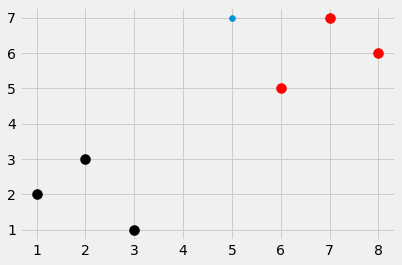

In [4]:
#simple test dataset just for example 'k' and 'r' are groups
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]] }
newfeature = [5,7]

style.use('fivethirtyeight')
#graphic with gruped dots
[[plt.scatter(j[0],j[1], s=100, color=i) for j in dataset[i]] for i in dataset]
plt.scatter(newfeature[0],newfeature[1])
plt.show

In [5]:
result = k_nearest_neighbors(dataset, newfeature)
print(result)

[('r', 3)]
r


<div>
  <h2>Comparision Between Algorithms</h2>
</div>

In [13]:
#read df
df = pd.read_csv('breast-cancer-wisconsin.data')

# ? indicates missing data on data set
# replace with -99999, most algorithms trets as a outlier
df.replace('?', -99999, inplace=True)

#remove column id (not contribution to the model)
df.drop(['id'], 1, inplace=True)

#convert values to float to ensure tha data is numerical type (avoid problems)
full_data = df.astype(float).values.tolist()
#shuffle (change order) df
random.shuffle(full_data)

<div>
    <h3>1. Sklearn</h3>
</div>

In [56]:
def callsklearn(df):
    X = np.array(df.drop(['class'],1))
    y = np.array(df['class'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)

    return accuracy

<div>
    <h3>2. k_nearest_neighbors</h3>
</div>

In [58]:
def callknn(full_data):
    #initiates our dicts to call the function
    test_size = 0.2
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}

    #first p% of the data is for train, the rest for test
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    #populate sets
    for i in train_data:
        #last column is the class
        train_set[i[-1]].append(i[:-1]) #up to the last column
    
    for i in test_data:
        #last column is the class
        test_set[i[-1]].append(i[:-1]) #up to the last column
    
    # verify if classificated correctely
    correct = 0
    total = 0

    #compare each test element to train_set 
    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors(train_set, data, k=5)
            if group == vote:
                correct+=1
            #else:
                #incorrects
                #print(confidence)
            total+=1
        
    #print('accuracy:', correct/total)

    return accuracy

In [65]:
number_of_tests = 25

accuracy_knn = []
accuracy_sklearn = []
for i in range(25):
    #full_data_copy = full_data.copy()
    random.shuffle(full_data)
    
    accuracy = callknn(full_data)
    print('accuracy knn:', accuracy)
    accuracy_knn.append(accuracy)
    
    #full_data_copy = full_data.copy()
    accuracy = callsklearn(df)
    print('accuracy sklearn:', accuracy)
    accuracy_sklearn.append(accuracy)
    
print('final accuracy knn:', mean(accuracy_knn))
print('final accuracy sklearn:', mean(accuracy_sklearn))
    

accuracy knn: 0.9857142857142858
accuracy sklearn: 0.9714285714285714
accuracy knn: 0.9714285714285714
accuracy sklearn: 0.9642857142857143
accuracy knn: 0.9642857142857143
accuracy sklearn: 0.9714285714285714
accuracy knn: 0.9714285714285714
accuracy sklearn: 0.9714285714285714
accuracy knn: 0.9714285714285714
accuracy sklearn: 0.95
accuracy knn: 0.95
accuracy sklearn: 0.9642857142857143
accuracy knn: 0.9642857142857143
accuracy sklearn: 0.9785714285714285
accuracy knn: 0.9785714285714285
accuracy sklearn: 0.9785714285714285
accuracy knn: 0.9785714285714285
accuracy sklearn: 0.9714285714285714
accuracy knn: 0.9714285714285714
accuracy sklearn: 0.9571428571428572
accuracy knn: 0.9571428571428572
accuracy sklearn: 0.9928571428571429
accuracy knn: 0.9928571428571429
accuracy sklearn: 0.9714285714285714
accuracy knn: 0.9714285714285714
accuracy sklearn: 0.9857142857142858
accuracy knn: 0.9857142857142858
accuracy sklearn: 0.9714285714285714
accuracy knn: 0.9714285714285714
accuracy sklear